In [1]:
import pandas as pd 

a=pd.read_csv('/home/santhosh/Downloads/StressLevelDataset.csv')
a

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


In [2]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [3]:
a.columns[a.isnull().any()]

Index([], dtype='object')

In [4]:
x=a.drop("stress_level",axis=1)
y=a["stress_level"]

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=550,random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=550, random_state=42)

In [7]:
y_pres=rf.predict(x_test)

In [8]:
x_pred=rf.predict(x_train)

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [12]:
accuracy_score(y_test,y_pres)

0.8818181818181818

In [23]:
cm=confusion_matrix(y_test,y_pres)
cm

array([[68,  3,  5],
       [ 7, 64,  2],
       [ 6,  3, 62]])

In [14]:
classification_report(y_test,y_pres)

'              precision    recall  f1-score   support\n\n           0       0.84      0.89      0.87        76\n           1       0.91      0.88      0.90        73\n           2       0.90      0.87      0.89        71\n\n    accuracy                           0.88       220\n   macro avg       0.88      0.88      0.88       220\nweighted avg       0.88      0.88      0.88       220\n'

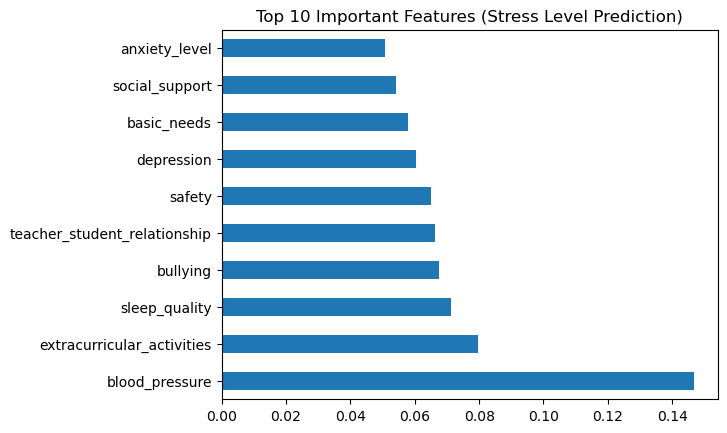

In [21]:
import matplotlib.pyplot as plt

chart= pd.Series(rf.feature_importances_, index=x.columns)
chart.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (Stress Level Prediction)")
plt.show()


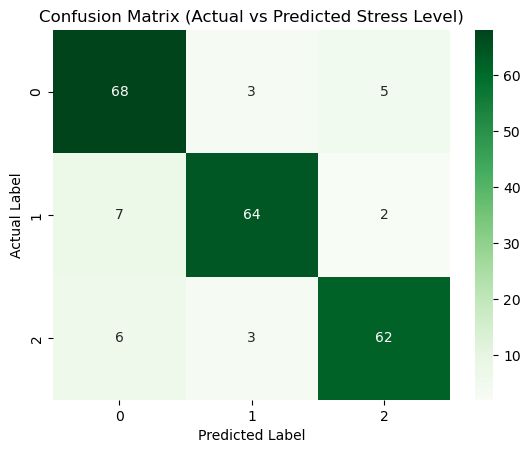

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion Matrix (Actual vs Predicted Stress Level)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
